## Uncapacitated Facility Location problem

In [11]:
nI = 50  # number of facilities
nJ = 50  # number of customers

# generate random problem instance
srand(1)
f = rand(nI)
#f = 0.5*ones(nI)
c = rand(nI,nJ)

using JuMP, Gurobi, Mosek, GLPKMathProgInterface, Cbc
#m = Model(solver = GLPKSolverMIP())
m = Model(solver = CbcSolver())
#m = Model(solver = MosekSolver())
#m = Model(solver = GurobiSolver(OutputFlag=false))

@variable(m, x[1:nI], Bin)         # binary constraint
#@variable(m, 1 >= x[1:nI] >= 0)    # LP relaxation

@variable(m, y[1:nI,1:nJ], Bin)     # binary constraint
#@variable(m, y[1:nI,1:nJ] >= 0)   # LP relaxation

@constraint(m, cc[j = 1:nJ], sum( y[i,j] for i=1:nI ) == 1)

# choose one of these two constraints (they are equivalent)
#@constraint(m, cr[i=1:nI], sum( y[i,j] for j=1:nJ ) <= nJ*x[i])
@constraint(m, cr[i=1:nI,j=1:nJ], y[i,j] <= x[i])

@objective(m, Min, dot(f,x) + vecdot(c,y))

@time(solve(m))

  0.296071 seconds (139 allocations: 880.906 KB)


:Optimal

In [204]:
using JuMP, Gurobi, Mosek, GLPKMathProgInterface, Cbc

nvals = [5,10,15,20,25,30,35,40,45,50]
tt_glpk = zeros(length(nvals),50)
tt_cbc = zeros(length(nvals),50)
tt_mosek = zeros(length(nvals),50)
tt_gurobi = zeros(length(nvals),50)
;

In [221]:
t = tt_glpk
for count = 1:50
    println(count)
    for (k,n) in enumerate(nvals)
        nI = n  # number of facilities
        nJ = n  # number of customers

        # generate random problem instance
        srand(count)
        f = 0.5*ones(nI)
        c = rand(nI,nJ)

        m = Model(solver = GLPKSolverMIP())
        #m = Model(solver = CbcSolver())
        #m = Model(solver = MosekSolver())
        #m = Model(solver = GurobiSolver(OutputFlag=false))

        @variable(m, x[1:nI], Bin)         # binary constraint
        @variable(m, y[1:nI,1:nJ] >= 0)    # LP relaxation
        @constraint(m, cc[j = 1:nJ], sum( y[i,j] for i=1:nI ) == 1)
        @constraint(m, cr[i=1:nI,j=1:nJ], y[i,j] <= x[i])
        @objective(m, Min, dot(f,x) + vecdot(c,y))
        t[k,count] = @timed(solve(m))[2]
    end
end

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [222]:
tt_gurobi_mean = mean(tt_gurobi,2)
tt_mosek_mean = mean(tt_mosek,2)
tt_cbc_mean = mean(tt_cbc,2)
tt_glpk_mean = mean(tt_glpk,2)

10x1 Array{Float64,2}:
 0.000643319
 0.00223086 
 0.00579795 
 0.0139505  
 0.0410312  
 0.0630404  
 0.100334   
 0.172744   
 0.306575   
 0.787915   

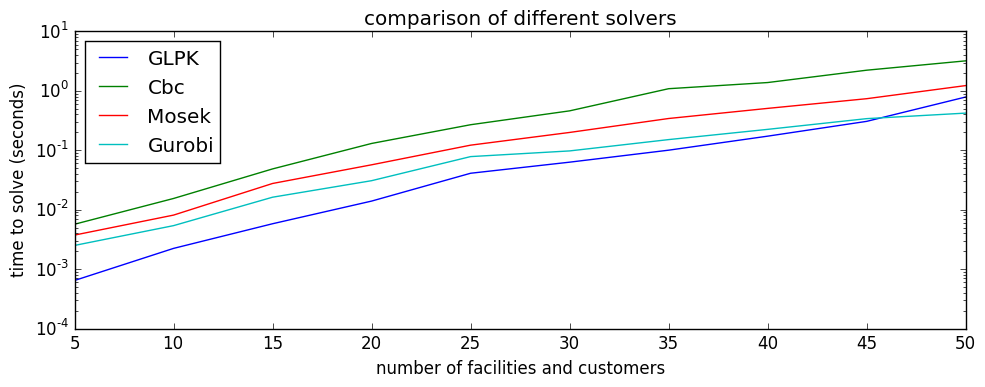

In [231]:
using PyPlot

figure(figsize=(10,4))
semilogy(nvals,tt_glpk_mean,label="GLPK")
semilogy(nvals,tt_cbc_mean,label="Cbc")
semilogy(nvals,tt_mosek_mean,label="Mosek")
semilogy(nvals,tt_gurobi_mean,label="Gurobi")
legend(loc="best")
xlabel("number of facilities and customers")
ylabel("time to solve (seconds)")
title("comparison of different solvers")
tight_layout()

savefig("solver_comparison.pdf")
;

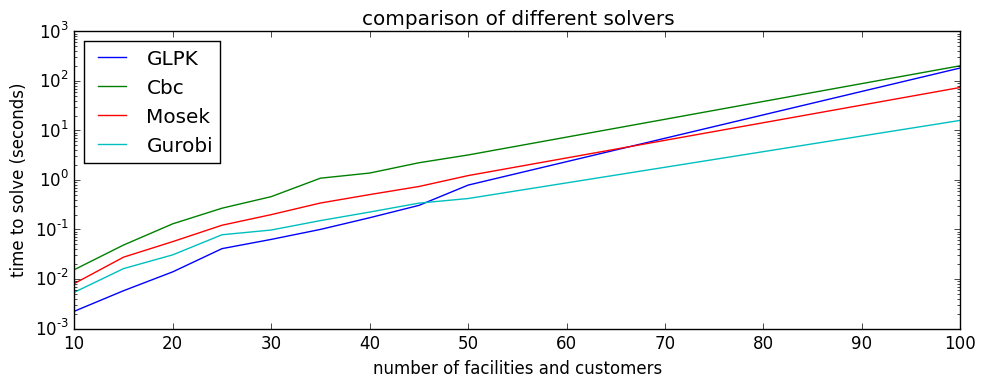

In [235]:
using PyPlot

nv = [nvals; 100]
t1 = [tt_glpk_mean; 183]
t2 = [tt_cbc_mean; 203]
t3 = [tt_mosek_mean; 74]
t4 = [tt_gurobi_mean; 16]

figure(figsize=(10,4))
semilogy(nv,t1,label="GLPK")
semilogy(nv,t2,label="Cbc")
semilogy(nv,t3,label="Mosek")
semilogy(nv,t4,label="Gurobi")
legend(loc="best")
xlabel("number of facilities and customers")
ylabel("time to solve (seconds)")
title("comparison of different solvers")
tight_layout()
axis([10,100,1e-3,1e3])

savefig("solver_comparison.pdf")
;